<a href="https://colab.research.google.com/github/kaho0/Aaagh-more-math/blob/main/Module_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
)

plt.rcParams["figure.figsize"] = (7, 5)

#  Module 11.3 – Building a Simple Decision Tree (Synthetic Data)

This module introduces decision trees using a very small, easy-to-understand dataset.  
The goal is **intuition**, not accuracy.

---

##  Objectives

- Create a **tiny synthetic dataset**  
- Train a **Decision Tree Classifier**  
- Visualize the **learned tree**  
- Understand **how the tree makes decisions**

---

# 🔹 11.3.1 Create a Small Synthetic Dataset

For this example, we use a toy dataset with just two input features:

### **Features**
- **Weather**: `"Sunny"` or `"Rainy"`
- **Windy**: `0` = No, `1` = Yes  

### **Target**
- **Play**:  
  - `1` = Play  
  - `0` = Do not play  

We will manually create this dataset using a pandas DataFrame.

---

##  Code: Create the Dataset

```python
import pandas as pd

# Tiny synthetic dataset
data = {
    "Weather": ["Sunny", "Sunny", "Rainy", "Rainy", "Sunny", "Rainy"],
    "Windy":   [0,       1,       0,       1,       0,       1],
    "Play":    [1,       0,       1,       0,       1,       0]
}

df = pd.DataFrame(data)
df


# 🔹 11.3.2 Encode Categorical Feature and Prepare X, y

Machine learning models in sklearn expect numeric inputs.  
We will encode the categorical feature:

- **Sunny → 1**  
- **Rainy → 0**  

The feature **Windy** is already numeric (0/1), so we use it directly.  
The target variable **Play** is already 0/1.

---
#

In [3]:
data = {
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
    'Windy':   [0,        1,       0,        1,        0,        1,        0,       1],
    'Play':    [1,        0,       1,        1,        0,        0,        1,       0]
}
df_synthetic = pd.DataFrame(data)
df_synthetic


,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


# 🔹 11.3.3 Train a Simple Decision Tree

Now we train a Decision Tree Classifier.

We set `max_depth=3` just to keep the tree small and easily interpretable.
For this introductory example, we fit the model on all available data, as the primary goal is to build intuition rather than perform rigorous evaluation.

In [4]:
df_synthetic['Weather_num']=df_synthetic['Weather'].map({'Sunny':1,'Rainy':0})
x_syn=df_synthetic[['Weather_num','Windy']]
y_syn=df_synthetic['Play']
display(x_syn)
display(y_syn)

,Weather_num,Windy
0,1,0
1,0,1
2,1,0
3,1,1
4,0,0
5,0,1
6,1,0
7,0,1


,Play
0,1
1,0
2,1
3,1
4,0
5,0
6,1
7,0


In [5]:
tree_syn=DecisionTreeClassifier(max_depth=3,random_state=42)
tree_syn.fit(x_syn,y_syn)
tree_syn

DecisionTreeClassifier(max_depth=3, random_state=42)

# 🔹 11.3.4 Visualize the Tree

Now we plot the tree. This helps students see:

- The root split
- Branches
- Leaf predictions
- How many samples go to each node

Note: `class_names=['No', 'Yes']` aligns with Play: `0` = No, `1` = Yes.

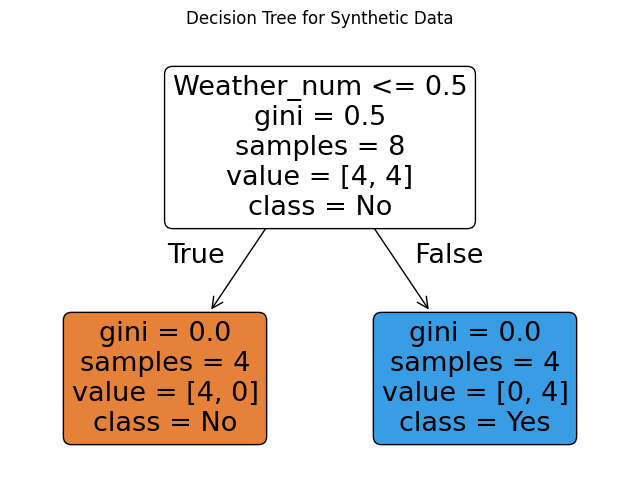

In [6]:
plt.figure(figsize=(8,6))
plot_tree(tree_syn,
          feature_names=['Weather_num','Windy'],
          class_names=['No','Yes'],
          filled=True,
          rounded=True,

          )
plt.title('Decision Tree for Synthetic Data')
plt.show()

In [7]:
exmple_1=pd.DataFrame([[1,0]],columns=['Weather_num','Windy'])
pred_1=tree_syn.predict(exmple_1)
pred_1

array([1])

# Module 11.4 – Overfitting and Pruning
In this section, we will:

- See how a deep tree can overfit
- Compare it with a pruned tree using `max_depth`
- Compare training vs test performance

We will use a slightly larger synthetic dataset so that overfitting becomes visible.

# 🔹 11.4.1 Create a slightly larger synthetic dataset
We create a synthetic binary classification dataset using `sklearn.datasets.make_classification`. This is not a real medical dataset, but it is enough to show overfitting clearly.

In [8]:
from sklearn.datasets import make_classification
X_big,y_big=make_classification(n_samples=400, ##total ddata point
                                n_features=5, ## total feature num
                                n_informative=3, ##total relevant features
                                n_redundant=0,# not high corelation among the features
                                n_classes=2,#target variable/feature class num
                                random_state=42
                                )

X_train_big,X_test_big,y_train_big,y_test_big=train_test_split(X_big,y_big,test_size=0.2,random_state=42)
X_train_big.shape,X_test_big.shape



((320, 5), (80, 5))

# 🔹 11.4.2 Train a deep tree vs a pruned tree
We now train two models:

- `deep_tree`: no depth limit (can easily overfit)
- `pruned_tree`: `max_depth=3`

We compare their training and test accuracy.

In [9]:
deep_tree=DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train_big,y_train_big)

pruned_tree=DecisionTreeClassifier(max_depth=3,random_state=42)
pruned_tree.fit(X_train_big,y_train_big)

y_train_pred_deep=deep_tree.predict(X_train_big)
y_test_pred_deep=deep_tree.predict(X_test_big)

y_train_pred_pruned=pruned_tree.predict(X_train_big)
y_test_pred_pruned=pruned_tree.predict(X_test_big)

print("Deep tree - train accuracy: ",round(accuracy_score(y_train_big,y_train_pred_deep),3))
print("Deep tree - test accuracy: ",round(accuracy_score(y_test_big,y_test_pred_deep),3) )
print("Pruned tree - train accuracy: ",round(accuracy_score(y_train_big,y_train_pred_pruned),3))
print("Pruned tree - test accuracy: ",round(accuracy_score(y_test_big,y_test_pred_pruned),3) )

Deep tree - train accuracy:  1.0
Deep tree - test accuracy:  0.863
Pruned tree - train accuracy:  0.906
Pruned tree - test accuracy:  0.887


# 🔹 11.4.3 Visual comparison of deep vs pruned trees
We now visualize both trees. The deep tree will usually be more complex than the pruned one.

To keep the plots readable, we only show a few top levels of the deep tree.

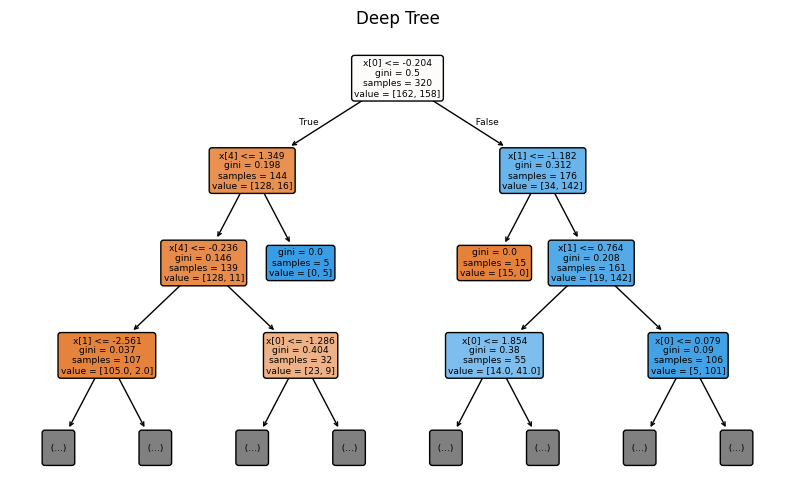

In [10]:
plt.figure(figsize=(10,6))
plot_tree(deep_tree,filled=True,rounded=True,max_depth=3)
plt.title('Deep Tree')
plt.show()

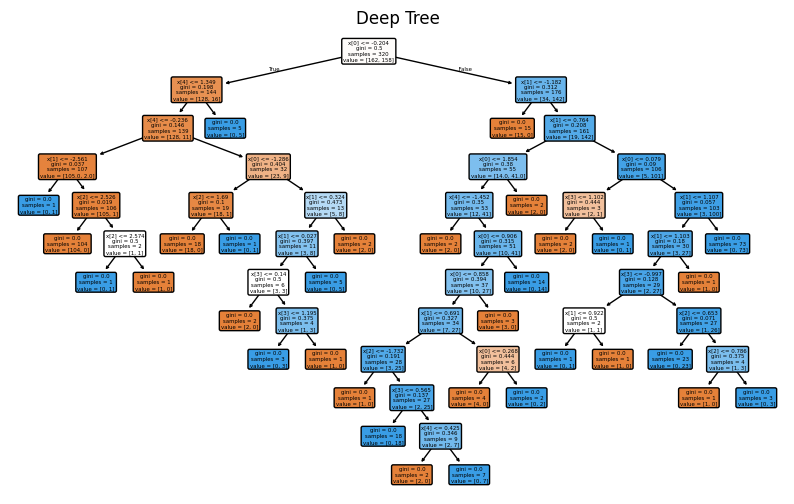

In [11]:
plt.figure(figsize=(10,6))
plot_tree(deep_tree,filled=True,rounded=True)
plt.title('Deep Tree')
plt.show()

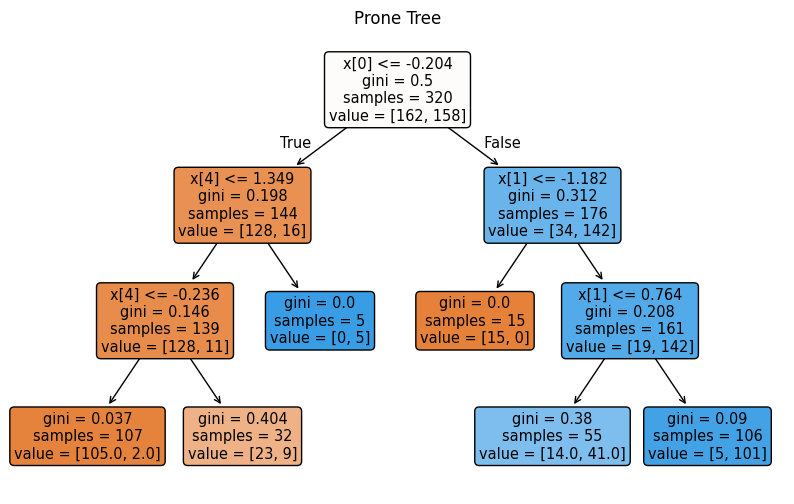

In [12]:
plt.figure(figsize=(10,6))
plot_tree(pruned_tree,filled=True,rounded=True)
plt.title('Prone Tree')
plt.show()

From the accuracy and the plots, we can highlight:

- **Deep tree** often has very high training accuracy but may drop significantly on test data.
- **Pruned tree** has slightly lower training accuracy but often shows better or more stable test performance.

This demonstrates the concept of **overfitting** (deep tree) versus **generalization** (pruned tree).

# 🩺 Module 11.5 – Simple Heart-Disease-Like Synthetic Dataset

In this section, we will:

- Create a small heart-disease-like dataset  
- Train a **Decision Tree Classifier**  
- Compute and interpret:
  - Confusion Matrix  
  - Accuracy  
  - Precision  
  - Recall  
  - F1 Score  

---

# 🔹 11.5.1 Create a Toy Heart-Disease-Like Dataset

We simulate a tiny dataset with three numeric features:

- **age**
- **chol** (cholesterol)
- **thalach** (maximum heart rate achieved)

The target variable `target` will be:

- `0` = No disease  
- `1` = Disease  

---

## 📌 Code: Create the Dataset

```python
import pandas as pd

# Simulated heart disease data
data = {
    "age":     [45, 50, 38, 62, 55, 48, 60, 35, 70, 58],
    "chol":    [230, 250, 180, 290, 260, 210, 300, 170, 310, 240],
    "thalach": [150, 140, 170, 130, 135, 160, 120, 180, 110, 145],
    "target":  [0,   1,   0,   1,   1,   0,   1,   0,   1,   1]
}

df = pd.DataFrame(data)
df


In [14]:
np.random.seed(42)
n_samples = 300

age = np.random.randint(30, 80, size=n_samples)
chol = np.random.randint(150, 300, size=n_samples)
thalach = np.random.randint(90, 200, size=n_samples)

risk_score=0.3*(age-40)+0.2*((chol-200)-0.02*(thalach-150))
prob=1/(1+np.exp(-0.05*risk_score))
target=(prob>np.median(prob)).astype(int)

df_heart=pd.DataFrame({'age':age,
                       'chol':chol,
                       'thalach':thalach,
                       'target':target})
df_heart

,age,chol,thalach,target
0,68,253,128,1
1,58,233,90,1
2,44,261,92,1
3,72,248,166,1
4,37,242,181,0
...,...,...,...,...
295,62,207,188,0
296,53,297,104,1
297,40,210,153,0
298,78,276,178,1


In [16]:
X_heart=df_heart[['age','chol','thalach']]
y_heart=df_heart['target']
X_train_heart,X_test_heart,y_train_heart,y_test_heart=train_test_split(
    X_heart,y_heart,test_size=0.2,random_state=42
    )
tree_heart=DecisionTreeClassifier(max_depth=4,random_state=42)
tree_heart.fit(X_train_heart,y_train_heart)

tree_heart

DecisionTreeClassifier(max_depth=4, random_state=42)

In [17]:
y_predict_h=tree_heart.predict(X_test_heart)

confmat=confusion_matrix(y_test_heart,y_predict_h)
confmat

array([[25,  2],
       [ 1, 32]])

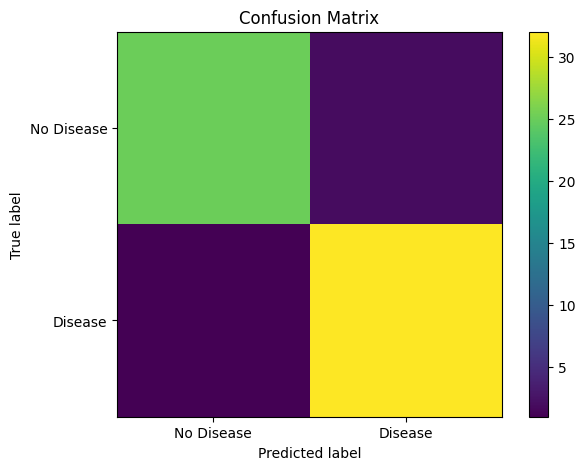

/tmp/ipython-input-3498076149.py:16: UserWarning: Adding colorbar to a different Figure <Figure size 700x500 with 3 Axes> than <Figure size 700x500 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(im)


<Figure size 700x500 with 0 Axes>

In [18]:
fig,ax=plt.subplots()
im=ax.imshow(confmat,interpolation='nearest')
ax.set_title("Confusion Matrix")
ax.set_ylabel("True label")
ax.set_xlabel("Predicted label")
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['No Disease','Disease'])
ax.set_yticklabels(['No Disease','Disease'])
plt.colorbar(im)
plt.show()

for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(j,i,confmat[i,j],ha='center',va='center')
plt.colorbar(im)
plt.show()

# 🔹 11.5.4 Accuracy, Precision, Recall, F1 Score

Now we compute the standard **classification metrics** to evaluate our decision tree model.

### Interpretation Guide:

- **Accuracy** → Overall correctness of the model  
- **Precision** → Among predicted positive cases, how many are truly positive  
- **Recall** → Among actual positive cases, how many were correctly identified  
- **F1 Score** → Harmonic mean of precision and recall  


In [19]:
acc=accuracy_score(y_test_heart,y_predict_heart)
prec=precision_score(y_test_heart,y_predict_heart)
rec=recall_score(y_test_heart,y_predict_heart)
f1=f1_score(y_test_heart,y_predict_heart)

NameError: name 'y_predict_heart' is not defined